In [1]:
import requests
import numpy as np
from urllib.request import Request, urlopen
from bs4 import BeautifulSoup
import re
import geopy.geocoders as geocoders
import pandas as pd
import geocoder
from random import randint
import random
import time
import os
from unidecode import unidecode
import os
import zipfile
import requests
import numpy as np
from urllib.request import Request, urlopen
from bs4 import BeautifulSoup
import re
import geopy.geocoders as geocoders
import pandas as pd
import geocoder
from random import randint
import random
import time
import os
import fiona
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer

In [2]:
# import geopandas as gpd

# # Read the geodatabase
# gdb_path = "my_gdb.gdb"
# gdb = gpd.read_file(gdb_path)

# # Get the specific layer
# layer_name = "my_layer"
# layer = gdb[gdb['layer_name'] == layer_name]


In [3]:
# Specify the path to the geodatabase
gdb_path = "../Gestores_Habilitados.gdb"

import fiona

# Specify the path to the geodatabase


# Get the layer names using fiona
layer_names = fiona.listlayers(gdb_path)

# Print the layer names
for layer_name in layer_names:
    print(layer_name)

R_ZONA_HOMOGENEA_FISICA
R_ZONA_HOMOGENEA_GEOECONOMICA
ZHR_NORMA_USO_SUELO
ZHR_AREA_HOMOGENEA_TIERRA
ZHR_FISICA
ZHR_PUNTO_MERCADO_INMOBILIARIO
ZHR_DISPONIBILIDAD_AGUA
ZHR_USO_ACTUAL_SUELO
ZHR_GEOECONOMICA
ZHR_INFLUENCIA_VIAL
ZHU_PUNTO_MERCADO_INMOBILIARIO
ZHU_USO_ACTUAL_SUELO
ZHU_GEOECONOMICA
U_ZONA_HOMOGENEA_FISICA
ZHU_FISICA
ZHU_TOPOGRAFIA
U_ZONA_HOMOGENEA_GEOECONOMICA
ZHU_INFLUENCIA_VIAL
ZHU_SERVICIO_PUBLICO
ZHU_NORMA_USO_SUELO
ZHU_TIPIFICACION_CONSTRUCCION
R_VEREDA
R_UNIDAD
R_TERRENO
R_SECTOR
R_NOMENCLATURA_VIAL
R_NOMENCLATURA_DOMICILIARIA
R_CONSTRUCCION
U_BARRIO
U_TERRENO
U_CONSTRUCCION
U_NOMENCLATURA_VIAL
U_NOMENCLATURA_DOMICILIARIA
U_UNIDAD
U_PERIMETRO
U_SECTOR
U_MANZANA
R_UNIDAD_INFORMAL
R_CONSTRUCCION_INFORMAL
R_TERRENO_INFORMAL
U_TERRENO_INFORMAL
U_CONSTRUCCION_INFORMAL
U_UNIDAD_INFORMAL


In [4]:
#gdb = gpd.read_file("Gestores_Habilitados.gdb")
gdb_path = "../Gestores_Habilitados.gdb"
layer_name = "R_TERRENO"
gdb = gpd.read_file(gdb_path, layer=layer_name)
#gdb_u_manzana = gpd.read_file("2022_12/shp/25/U_MANZANA/U_MANZANA.shp")
# Transform the coordinate system to EPSG:4326 (WGS84)
#gdb = gdb.to_crs("EPSG:4326")


In [11]:
gdb["codigo_departamento"] = gdb["codigo_municipio"].str[:2]

In [18]:
gdb1 = gdb[gdb["codigo_departamento"] == "08"]
gdb1 = gdb1.to_crs("EPSG:4326")

In [15]:
gdb1

,CODIGO,VEREDA_CODIGO,NUMERO_SUBTERRANEOS,CODIGO_ANTERIOR,USUARIO_LOG,FECHA_LOG,GLOBALID,GLOBALID_SNC,SHAPE_Length,SHAPE_Area,codigo_municipio,CODIGO_DEPARTAMENTO,geometry,codigo_departamento
92433,250190000000000110050000000000,25019000000000011,0,25019000000110050000,NaN,NaT,{82459AFB-C9E1-45F3-B919-82E3B33B4D8C},NaN,780.206568,34937.841382,25019,25,"MULTIPOLYGON (((4836345.824 2105381.163, 48363...",25
92434,250190000000000020133000000000,25019000000000002,0,25019000000020133000,NaN,NaT,{DD1384B1-7D46-4319-8D7E-C22DECDCD554},NaN,1609.653416,50749.338613,25019,25,"MULTIPOLYGON (((4836375.709 2102111.828, 48364...",25
92435,250190000000000020136000000000,25019000000000002,0,25019000000020136000,NaN,NaT,{3CCCE6AF-1A3E-4574-BB21-64EACFD9967C},NaN,995.579004,49443.634984,25019,25,"MULTIPOLYGON (((4836700.691 2102159.544, 48367...",25
92436,250190000000000020135000000000,25019000000000002,0,25019000000020135000,NaN,NaT,{F83F3D0E-1521-4D35-9BCF-34B357E234A7},NaN,360.677348,5735.161632,25019,25,"MULTIPOLYGON (((4836736.065 2102036.933, 48366...",25
92437,250190000000000020132000000000,25019000000000002,0,25019000000020132000,NaN,NaT,{E99A7B73-7FFE-4538-9B71-02E75B6C7007},NaN,772.161748,30080.344272,25019,25,"MULTIPOLYGON (((4836212.273 2102013.097, 48362...",25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
483326,258990000000000070004000000000,25899000000000007,0,25899000000070004000,NaN,NaT,{8BA6A325-EE6C-4D40-B67C-8846E218DD64},NaN,844.464713,38457.692660,25899,25,"MULTIPOLYGON (((4890084.127 2115123.638, 48900...",25
483327,258990000000000062549000000000,25899000000000006,0,25899000000062549000,NaN,NaT,{2B593F26-2203-405B-9602-15098C777242},NaN,80.785188,407.742895,25899,25,"MULTIPOLYGON (((4891709.519 2113734.590, 48917...",25
483328,258990000000000062549000000000,25899000000000006,0,25899000000062549000,NaN,NaT,{F6D62F38-37DA-41F9-ABFE-B116C12F4AEF},NaN,80.781138,407.742908,25899,25,"MULTIPOLYGON (((4891704.199 2113715.179, 48916...",25
483329,258990000000000062549000000000,25899000000000006,0,25899000000062549000,NaN,NaT,{C63711F0-024D-4BC3-A40F-72D5EB348FC7},NaN,90.493568,201.058871,25899,25,"MULTIPOLYGON (((4891714.367 2113733.380, 48917...",25


In [6]:
list(gdb["codigo_municipio"].unique())

['08296',
 '08433',
 '08573',
 '08638',
 '08758',
 '13001',
 '15176',
 '17001',
 '18001',
 '18150',
 '18753',
 '18756',
 '20001',
 '20178',
 '20614',
 '23660',
 '25019',
 '25035',
 '25040',
 '25053',
 '25095',
 '25123',
 '25126',
 '25151',
 '25154',
 '25168',
 '25178',
 '25200',
 '25214',
 '25224',
 '25245',
 '25258',
 '25260',
 '25269',
 '25279',
 '25281',
 '25288',
 '25290',
 '25293',
 '25297',
 '25299',
 '25307',
 '25312',
 '25317',
 '25320',
 '25326',
 '25328',
 '25335',
 '25368',
 '25372',
 '25386',
 '25394',
 '25398',
 '25407',
 '25436',
 '25438',
 '25483',
 '25486',
 '25489',
 '25491',
 '25506',
 '25518',
 '25524',
 '25530',
 '25535',
 '25580',
 '25592',
 '25594',
 '25596',
 '25599',
 '25645',
 '25653',
 '25662',
 '25718',
 '25736',
 '25743',
 '25754',
 '25758',
 '25769',
 '25777',
 '25779',
 '25781',
 '25793',
 '25797',
 '25799',
 '25805',
 '25807',
 '25815',
 '25839',
 '25841',
 '25843',
 '25845',
 '25862',
 '25867',
 '25871',
 '25873',
 '25875',
 '25878',
 '25885',
 '25898',


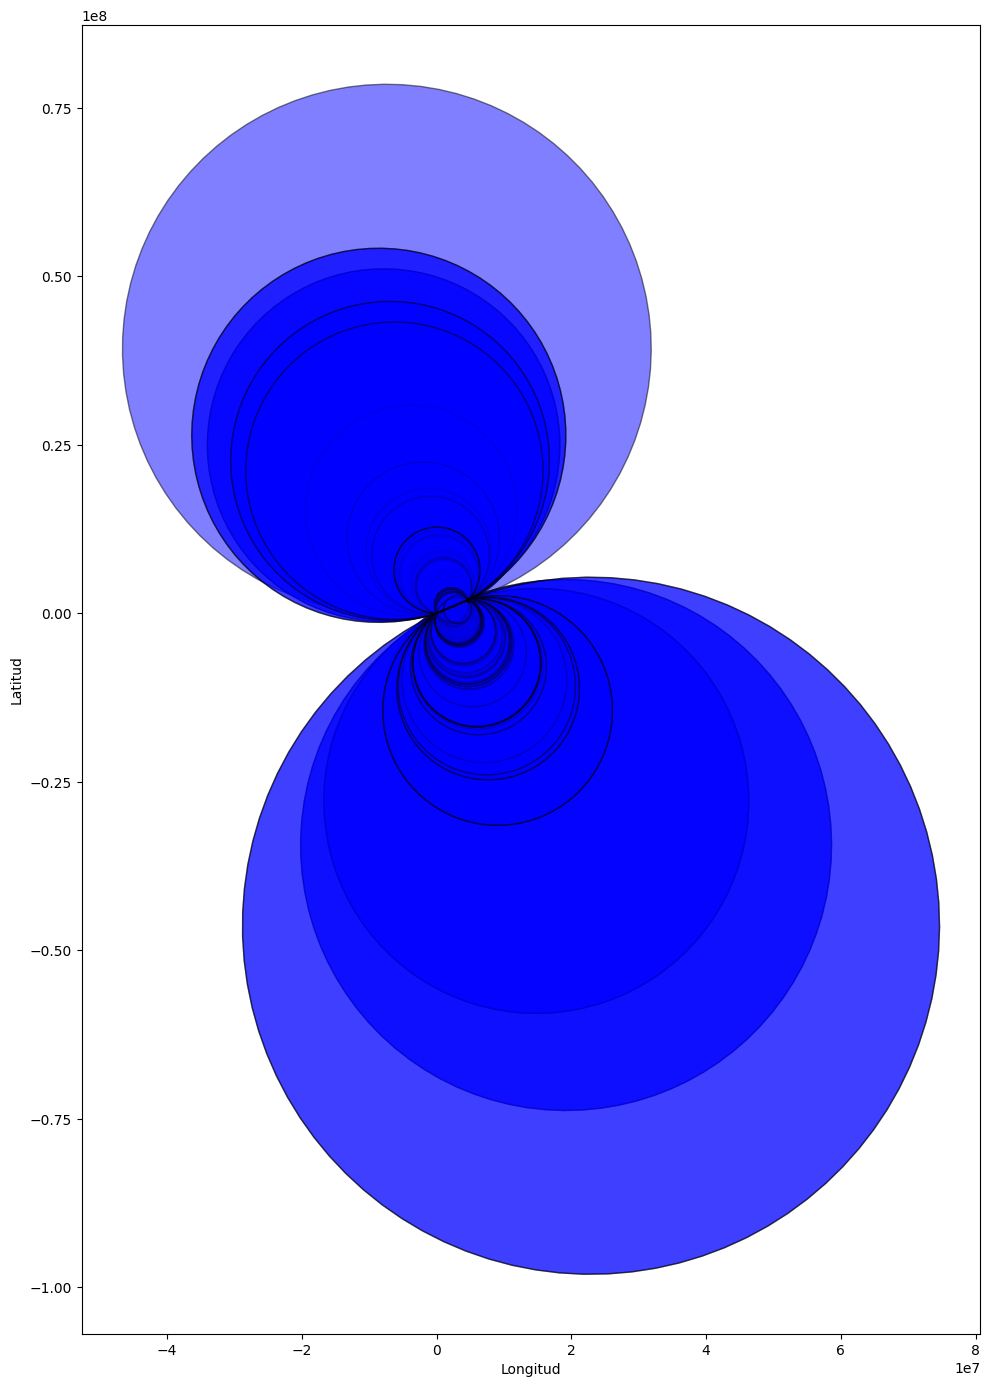

In [5]:
#gdb_u_manzana = gdb_u_manzana.to_crs("EPSG:4326")

#df_to_plot = df_final_georef_2[(df_final_georef_2["Código Departamento"].astype(int) == int(25)) & (df_final_georef_2["Longitude_arcgis"].notnull()) & (df_final_georef_2["Latitude_arcgis"].notnull())]

# Convert DataFrame to GeoDataFrame
#points = gpd.GeoDataFrame(df_to_plot, geometry=gpd.points_from_xy(df_to_plot.Longitude_arcgis, df_to_plot.Latitude_arcgis))

# Check the transformed CRS
#print(gdb_2.crs)
# Create a plot
fig, ax = plt.subplots(figsize=(20, 17))

#plt.scatter(x = df_to_plot["Longitude_arcgis"], y = df_to_plot["Latitude_arcgis"])

# Plot the GeoDataFrame
#ax.set_ylim(3.5, 6)
#ax.set_xlim(-75, -73.5)
gdb.plot(ax=ax, color='blue', edgecolor='black', alpha = 0.5)
#gdb_u_manzana.plot(ax=ax, color='red', edgecolor='black', alpha = 0.8)
#points.plot(ax=ax, color='black', markersize =12)

# Add a title to the plot
ax.set_title('')
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')

# Display the plot
plt.show()